<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_RandomForest_regioes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [75]:
base = pd.read_csv('/content/Customer.csv')

In [76]:
base.head()

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South


In [77]:
base.tail()

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
788,CJ-11875,Carl Jackson,Corporate,64,United States,Philadelphia,Pennsylvania,19140,East
789,RS-19870,Roy Skaria,Home Office,39,United States,Burlington,Iowa,52601,Central
790,SC-20845,Sung Chung,Consumer,69,United States,Arlington Heights,Illinois,60004,Central
791,RE-19405,Ricardo Emerson,Consumer,35,United States,Kent,Ohio,44240,East
792,SM-20905,Susan MacKendrick,Consumer,46,United States,Newark,Ohio,43055,East


In [78]:
base.describe()

,Age,Postal Code
count,793.000000,793.000000
mean,44.467844,55229.717528
std,15.526673,31679.223816
min,18.000000,1841.000000
25%,31.000000,27217.000000
50%,45.000000,55901.000000
75%,58.000000,90004.000000
max,70.000000,99207.000000


In [79]:
base.isnull().sum()

Customer ID      0
Customer Name    0
Segment          0
Age              0
Country          0
City             0
State            0
Postal Code      0
Region           0
dtype: int64

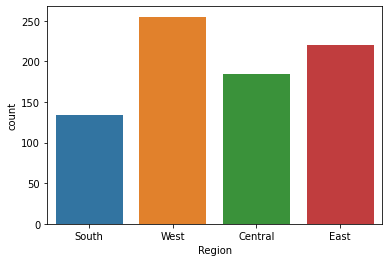

In [80]:
sns.countplot( x = base['Region']);

Region vai ser nosso target

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(base['Customer Name'])


In [83]:
base['name'] = labels


In [84]:
label_encode = LabelEncoder()
labels_ = label_encode.fit_transform(base['Country'])

In [85]:
base['pais'] = labels_

In [86]:
label_encode = LabelEncoder()
labels3 = label_encode.fit_transform(base['City'])

In [87]:
base['City'] = labels3

In [88]:
label_encode = LabelEncoder()
labels4 = label_encode.fit_transform(base['State'])

In [89]:
base['State'] = labels4

In [90]:
label_encode = LabelEncoder()
labels5 = label_encode.fit_transform(base['Segment'])

In [91]:
base['segmento'] = labels5

paar facilitar vamos criar nosso target para ficar por ultimo no dataset

In [92]:
label_encode = LabelEncoder()
labels2 = label_encode.fit_transform(base['Region'])

In [93]:
base['target'] = labels2

In [94]:
base.head()

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal Code,Region,name,pais,segmento,target
0,CG-12520,Claire Gute,Consumer,67,United States,90,14,42420,South,166,0,0,2
1,DV-13045,Darrin Van Huff,Corporate,31,United States,129,3,90036,West,201,0,1,3
2,SO-20335,Sean O'Donnell,Consumer,65,United States,71,8,33311,South,687,0,0,2
3,BH-11710,Brosina Hoffman,Consumer,20,United States,129,3,90032,West,113,0,0,3
4,AA-10480,Andrew Allen,Consumer,50,United States,42,28,28027,South,31,0,0,2


todos os dados estao numericos agora, os que nao importam mais, vamos apagar

In [ ]:
base.drop(columns=['Customer ID','Customer Name', 'Segment','Country', 'State','Region'], axis=1, inplace=True)

In [97]:
base.head()

,Age,City,Postal Code,Region,name,pais,segmento,target
0,67,90,42420,South,166,0,0,2
1,31,129,90036,West,201,0,1,3
2,65,71,33311,South,687,0,0,2
3,20,129,90032,West,113,0,0,3
4,50,42,28027,South,31,0,0,2


In [100]:
base.drop(columns=['Region'], axis=1, inplace=True)

In [101]:
base.head()

,Age,City,Postal Code,name,pais,segmento,target
0,67,90,42420,166,0,0,2
1,31,129,90036,201,0,1,3
2,65,71,33311,687,0,0,2
3,20,129,90032,113,0,0,3
4,50,42,28027,31,0,0,2


In [102]:
x_base = base.iloc[:,0:6].values
y_base = base.iloc[:,6].values

In [103]:
x_base

array([[   67,    90, 42420,   166,     0,     0],
       [   31,   129, 90036,   201,     0,     1],
       [   65,    71, 33311,   687,     0,     0],
       ...,
       [   69,     6, 60004,   721,     0,     0],
       [   35,   106, 44240,   625,     0,     0],
       [   46,   162, 43055,   725,     0,     0]])

In [104]:
y_base

array([2, 3, 2, 3, 2, 3, 0, 0, 3, 3, 0, 1, 3, 3, 1, 0, 0, 0, 0, 3, 2, 0,
       0, 1, 0, 1, 1, 3, 0, 3, 2, 1, 2, 0, 2, 3, 2, 0, 0, 0, 3, 0, 3, 1,
       3, 0, 0, 0, 3, 2, 0, 1, 0, 1, 3, 2, 1, 0, 0, 3, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 0, 3, 0, 0, 1, 0, 2, 1, 3, 0,
       1, 3, 1, 1, 1, 1, 3, 0, 2, 3, 0, 0, 1, 3, 1, 0, 2, 2, 3, 0, 0, 3,
       3, 1, 0, 1, 0, 0, 0, 3, 2, 1, 3, 3, 1, 3, 2, 1, 3, 1, 1, 2, 3, 1,
       2, 1, 1, 3, 3, 2, 1, 1, 3, 3, 3, 1, 1, 1, 2, 1, 3, 1, 0, 3, 0, 1,
       0, 3, 0, 2, 1, 1, 1, 3, 0, 3, 1, 0, 2, 1, 3, 3, 3, 3, 1, 2, 1, 0,
       2, 2, 0, 0, 0, 1, 1, 3, 3, 0, 1, 3, 1, 1, 3, 1, 3, 0, 0, 1, 3, 2,
       2, 3, 2, 0, 3, 0, 0, 1, 2, 1, 3, 3, 2, 3, 0, 2, 0, 1, 1, 3, 0, 2,
       3, 3, 2, 3, 3, 3, 1, 3, 3, 0, 3, 3, 2, 3, 0, 3, 1, 1, 2, 1, 0, 1,
       1, 1, 0, 0, 1, 3, 3, 2, 3, 0, 3, 0, 0, 3, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 2, 2, 1, 2, 3, 1, 3, 2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 0, 1, 3, 0,
       0, 0, 0, 3, 0, 1, 0, 1, 2, 2, 0, 1, 1, 3, 2,

In [105]:
x_base.shape

(793, 6)

In [106]:
y_base.shape

(793,)

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_base_treino, x_base_teste, y_base_treino, y_base_teste = train_test_split( x_base, y_base, test_size=0.30, random_state =0)

In [109]:
x_base_treino.shape

(555, 6)

In [110]:
y_base_treino.shape

(555,)

In [111]:
x_base_teste.shape

(238, 6)

In [112]:
y_base_teste.shape

(238,)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rf = RandomForestClassifier(n_estimators=50, criterion='entropy')

In [115]:
rf.fit(x_base_treino, y_base_treino)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [118]:
previsao = rf.predict(x_base_teste) #previsao dados
previsao

array([0, 0, 1, 0, 3, 3, 3, 2, 0, 1, 0, 1, 3, 1, 3, 0, 1, 2, 2, 0, 1, 1,
       3, 3, 2, 3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 2, 3, 2, 1, 1, 2, 1, 1, 0,
       1, 3, 0, 3, 1, 0, 2, 0, 3, 1, 3, 3, 2, 3, 1, 1, 3, 1, 1, 3, 0, 0,
       1, 3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 0, 0, 1, 1, 2, 3, 2, 0, 1,
       3, 0, 3, 3, 1, 1, 1, 0, 0, 1, 3, 3, 0, 0, 1, 3, 0, 3, 3, 0, 3, 3,
       3, 3, 3, 0, 3, 2, 3, 1, 0, 3, 0, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 0,
       3, 3, 2, 0, 0, 1, 3, 1, 2, 1, 3, 1, 3, 2, 1, 0, 0, 0, 3, 3, 3, 0,
       0, 3, 3, 3, 3, 3, 1, 0, 3, 1, 0, 3, 0, 2, 3, 3, 3, 2, 3, 2, 2, 1,
       1, 3, 3, 3, 2, 2, 1, 0, 1, 2, 3, 2, 0, 1, 0, 0, 0, 1, 3, 2, 3, 3,
       3, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 3, 0, 2, 1, 0, 3, 0, 3, 3, 1, 0,
       3, 1, 1, 0, 3, 0, 0, 2, 3, 3, 1, 3, 3, 0, 2, 3, 3, 0])

In [119]:
y_base_teste #base real

array([0, 0, 1, 0, 3, 3, 3, 2, 0, 1, 0, 1, 3, 1, 3, 0, 1, 2, 2, 0, 1, 1,
       3, 3, 2, 3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 2, 3, 2, 1, 1, 2, 1, 1, 0,
       1, 3, 0, 3, 1, 0, 2, 0, 3, 1, 3, 3, 2, 3, 1, 1, 3, 1, 1, 3, 0, 0,
       1, 3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 0, 0, 1, 1, 2, 3, 2, 0, 1,
       3, 0, 3, 3, 1, 1, 1, 0, 0, 1, 3, 3, 0, 0, 1, 3, 0, 3, 3, 0, 3, 3,
       3, 3, 3, 0, 3, 2, 3, 1, 0, 3, 0, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 0,
       3, 3, 2, 0, 0, 1, 3, 1, 2, 1, 3, 1, 3, 2, 1, 0, 0, 0, 3, 3, 3, 0,
       0, 3, 3, 3, 3, 3, 1, 0, 3, 1, 0, 3, 0, 2, 3, 3, 3, 2, 3, 2, 2, 1,
       1, 3, 3, 3, 2, 2, 1, 0, 1, 2, 3, 2, 0, 1, 0, 0, 0, 1, 3, 2, 3, 3,
       3, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 3, 0, 2, 1, 2, 3, 2, 3, 3, 1, 0,
       3, 1, 1, 0, 3, 0, 0, 2, 3, 3, 1, 3, 3, 0, 2, 3, 3, 0])

In [120]:
from sklearn.metrics import accuracy_score, classification_report

In [121]:
accuracy_score(y_base_teste, previsao)

0.9915966386554622

otima acurácia!!

In [122]:
from yellowbrick.classifier import ConfusionMatrix

0.9915966386554622

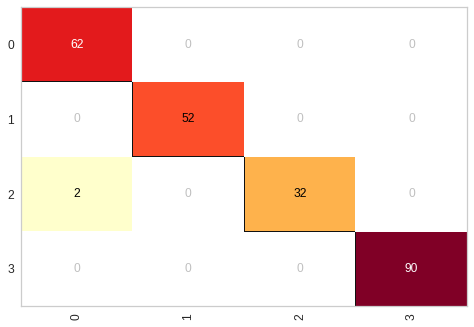

In [123]:
cm = ConfusionMatrix(rf)
cm.fit(x_base_treino, y_base_treino)
cm.score(x_base_teste, y_base_teste)

aqui vemos a matriz de confusão, mostrando a previsao e o acerto em cada regiao

In [124]:
print(classification_report(y_base_teste, previsao))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        62
           1       1.00      1.00      1.00        52
           2       1.00      0.94      0.97        34
           3       1.00      1.00      1.00        90

    accuracy                           0.99       238
   macro avg       0.99      0.99      0.99       238
weighted avg       0.99      0.99      0.99       238



aqui vemos direitinho cada passo do modelo, a previsão praticamete acertou tudo